In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from apps.utils import graphql_requests
from datetime import datetime, timedelta
from apps.utils.data_utils import remove_outliers


Definition of the timeframe: which time period will be evaluated?

In [7]:
start = datetime(2022, 11, 1)
end = datetime(2023, 7, 5)

start_epoch = start.timestamp()
end_epoch = end.timestamp()

# Definition of variables (sensors)

Definition of the relevant sensors and their corresponding identification numbers in the database:

In [8]:
## identifikationsnummer "idn"

idn_eel_gshp_em = 2680          # Strommenge (Stromzähler) 
idn_pel_gshp_em = 2681          # Elektrische Leistung (Stromzähler)

idn_e_gshp_hm_prim = 2613       # Wärmemenge Primärseitig
idn_t_gshp_prim_flow = 2511     # VL Temperatur Primär
idn_t_gshp_prim_return = 2392   # RL Temperatur Primär
idn_vdot_gshp_prim = 2620       # Volumenstrom Primärseitg

idn_e_gshp_hm_sec = 3363        # Wärmemenge Sekundärseitig
idn_t_gshp_sec_flow = 2525      # VL Temperatur Sekundär
idn_t_gshp_sec_return = 2406    # RL Temperatur Sekudär
idn_vdot_gshp_sec = 2564        # Volumenstrom Sekundärseitg

### Strommenge (Stromzähler)

datetime
2023-01-31 08:27:11        0.000000
2023-01-31 08:27:41     2235.169900
2023-01-31 08:41:11        0.000000
2023-01-31 08:41:41     2235.169900
2023-01-31 08:44:11     2235.179900
                           ...     
2023-06-17 11:34:06     4167.399902
2023-06-20 12:57:04    17793.980469
2023-06-27 17:45:48     4167.399902
2023-07-03 14:43:09    17793.980469
2023-07-04 09:53:40     4167.479980
Name: eel_gshp_em, Length: 46833, dtype: float64
mean = 3176.7167777905333
median = 3172.27


<Axes: xlabel='datetime'>

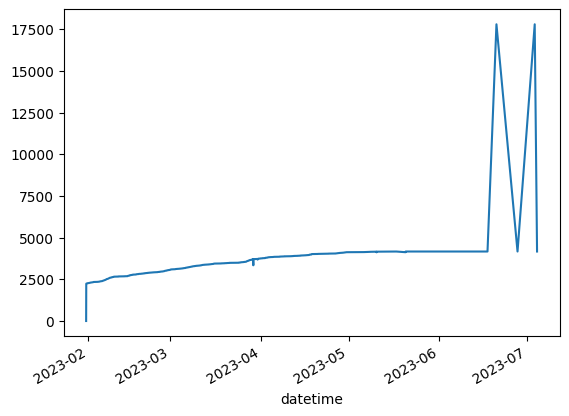

In [9]:
# Strommenge (Stromzähler)

eel_gshp_em = graphql_requests.request_sensor_readings_idn(2, idn_eel_gshp_em, start_epoch, end_epoch)
eel_gshp_em = eel_gshp_em.rename("eel_gshp_em")
print(eel_gshp_em)
print("mean =", eel_gshp_em.mean())
print("median =", eel_gshp_em.median())

eel_gshp_em.plot()


### Elektrische Leistung Stromzähler

## Primäre Seite

### VL Temperatur Primär

datetime
2022-11-02 10:08:44    20.375000
2022-11-02 10:09:15    20.375000
2022-11-02 10:16:28    20.687500
2022-11-02 10:16:58    20.781250
2022-11-02 10:17:28    20.781250
                         ...    
2023-07-04 18:49:08    29.520000
2023-07-04 19:11:08    29.639999
2023-07-04 19:37:08    29.780001
2023-07-04 20:11:08    29.900000
2023-07-04 21:01:09    30.000000
Name: t_gshp_prim_flow, Length: 516635, dtype: float64
mean = 15.269994218574606
median = 16.97


<Axes: xlabel='datetime'>

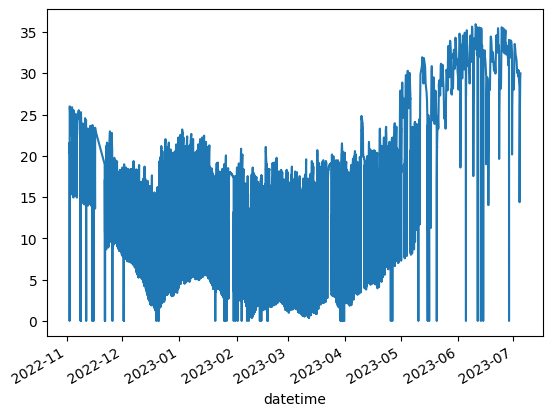

In [10]:
# VL Temperatur Primär

t_gshp_prim_flow = graphql_requests.request_sensor_readings_idn(2, idn_t_gshp_prim_flow, start_epoch, end_epoch)
t_gshp_prim_flow = t_gshp_prim_flow.rename("t_gshp_prim_flow")
print(t_gshp_prim_flow)
print("mean =", t_gshp_prim_flow.mean())
print("median =", t_gshp_prim_flow.median())

t_gshp_prim_flow.plot()


### RL Temperatur Primär

datetime
2022-11-02 10:08:44    16.218750
2022-11-02 10:09:14    16.312500
2022-11-02 10:16:27    16.546875
2022-11-02 10:16:57    16.593750
2022-11-02 10:17:27    16.593750
                         ...    
2023-07-04 20:34:35    27.420000
2023-07-04 20:51:35    27.530001
2023-07-04 21:11:05    27.660000
2023-07-04 21:33:05    27.799999
2023-07-04 21:58:06    27.910000
Name: t_gshp_prim_return, Length: 516139, dtype: float64
mean = 11.509712622405978
median = 11.62
11.509712622405978


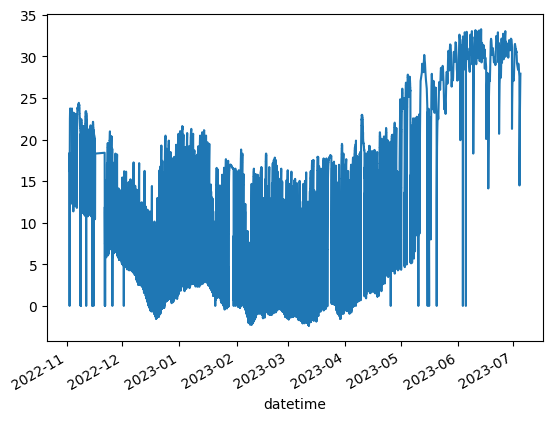

In [11]:
# RL Temperatur Primär

t_gshp_prim_return = graphql_requests.request_sensor_readings_idn(2, idn_t_gshp_prim_return, start_epoch, end_epoch)
t_gshp_prim_return = t_gshp_prim_return.rename("t_gshp_prim_return")
print(t_gshp_prim_return)
print("mean =", t_gshp_prim_return.mean())
print("median =", t_gshp_prim_return.median())

t_gshp_prim_return.plot()
print(np.mean(t_gshp_prim_return))

### Wärmemenge Primärseitig

datetime
2022-11-11 14:57:33    21.908897
2022-11-11 14:58:03    21.908897
2022-11-11 14:58:33    21.908898
2022-11-11 14:59:03    21.908898
2022-11-11 14:59:34    21.908898
                         ...    
2023-06-13 22:46:57    11.238850
2023-06-17 11:34:06    11.242989
2023-06-17 11:34:36    11.244936
2023-07-04 09:15:40    11.246394
2023-07-04 09:16:10    11.249891
Name: e_gshp_hm_prim, Length: 47418, dtype: float64
mean = 2353.5414082601387
median = 2365.8764499999997


<Axes: xlabel='datetime'>

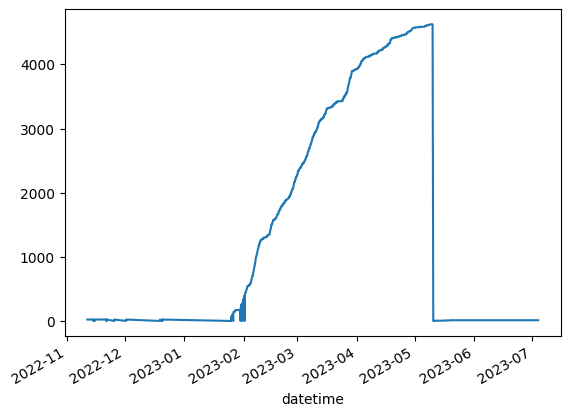

In [12]:
# Wärmemenge Primärseitig

e_gshp_hm_prim = graphql_requests.request_sensor_readings_idn(2, idn_e_gshp_hm_prim, start_epoch, end_epoch)
e_gshp_hm_prim = e_gshp_hm_prim.rename("e_gshp_hm_prim")
print(e_gshp_hm_prim)
print("mean =", e_gshp_hm_prim.mean())
print("median =", e_gshp_hm_prim.median())

e_gshp_hm_prim.plot()

### Volumenstrom Primärseitig

datetime
2022-11-02 10:08:45      0.000000
2022-11-02 10:09:15      0.000000
2022-11-02 10:16:28      0.000000
2022-11-02 10:16:58      0.000000
2022-11-02 10:17:28      0.000000
                          ...    
2023-07-04 09:15:10    271.899994
2023-07-04 09:15:40    270.269989
2023-07-04 09:16:10    130.820007
2023-07-04 09:16:40     64.029999
2023-07-04 09:17:10      0.000000
Name: vdot_gshp_prim, Length: 513284, dtype: float64
mean = 339.8630948615636
median = 0.0


<Axes: xlabel='datetime'>

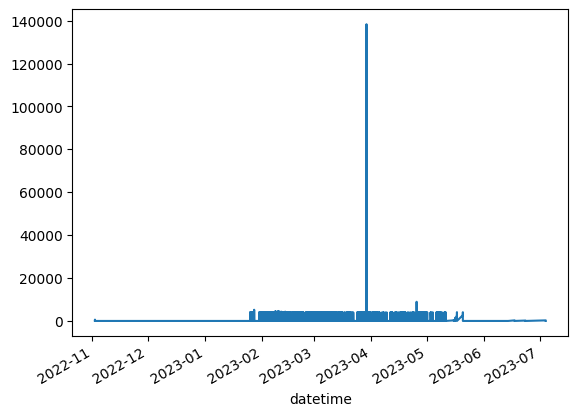

In [13]:
# Volumenstrom Primärseitig


vdot_gshp_prim = graphql_requests.request_sensor_readings_idn(2, idn_vdot_gshp_prim, start_epoch, end_epoch)
vdot_gshp_prim = vdot_gshp_prim.rename("vdot_gshp_prim")
print(vdot_gshp_prim)
print("mean =", vdot_gshp_prim.mean())
print("median =", vdot_gshp_prim.median())

vdot_gshp_prim.plot()


remove_outliers

## Sekundäre Seite

### VL Temperatur Sekundär

datetime
2022-11-02 10:08:45    34.031250
2022-11-02 10:09:15    34.031250
2022-11-02 10:16:28    33.531250
2022-11-02 10:16:58    33.531250
2022-11-02 10:17:28    33.437500
                         ...    
2023-07-04 21:20:36    52.950001
2023-07-04 21:26:36    52.840000
2023-07-04 21:38:36    52.689999
2023-07-04 21:45:36    52.570000
2023-07-04 21:53:36    52.419998
Name: t_gshp_sec_flow, Length: 535771, dtype: float64
mean = 36.34839930545099
median = 36.3


<Axes: xlabel='datetime'>

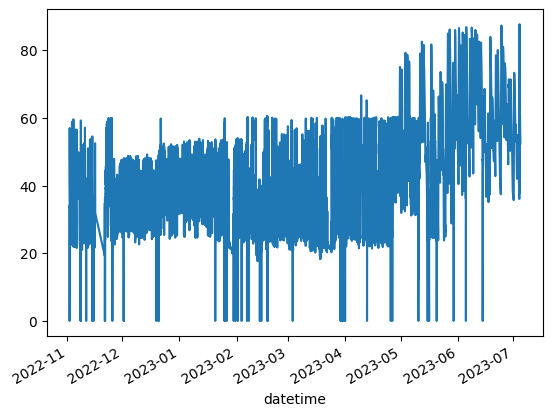

In [14]:
# VL Temperatur Sekundär

t_gshp_sec_flow = graphql_requests.request_sensor_readings_idn(2, idn_t_gshp_sec_flow, start_epoch, end_epoch)
t_gshp_sec_flow = t_gshp_sec_flow.rename("t_gshp_sec_flow")
print(t_gshp_sec_flow)
print("mean =", t_gshp_sec_flow.mean())
print("median =", t_gshp_sec_flow.median())

t_gshp_sec_flow.plot()

### RL Temperatur Sekundär

datetime
2022-11-02 10:08:44    25.671875
2022-11-02 10:09:14    25.671875
2022-11-02 10:16:27    25.671875
2022-11-02 10:16:57    25.671875
2022-11-02 10:17:27    25.671875
                         ...    
2023-07-04 21:27:09    49.400002
2023-07-04 21:33:10    49.240002
2023-07-04 21:39:39    49.110001
2023-07-04 21:46:10    49.000000
2023-07-04 21:58:10    48.790001
Name: t_gshp_sec_return, Length: 534527, dtype: float64
mean = 31.927794109805628
median = 29.34


<Axes: xlabel='datetime'>

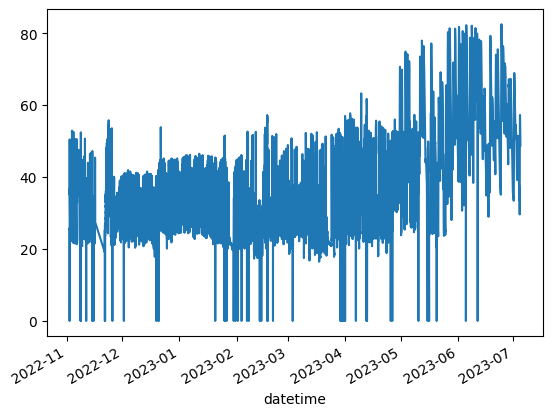

In [15]:
# RL Temperatur Sekundär

t_gshp_sec_return = graphql_requests.request_sensor_readings_idn(2, idn_t_gshp_sec_return, start_epoch, end_epoch)
t_gshp_sec_return = t_gshp_sec_return.rename("t_gshp_sec_return")
print(t_gshp_sec_return)
print("mean =", t_gshp_sec_return.mean())
print("median =", t_gshp_sec_return.median())

t_gshp_sec_return.plot()

### Wärmemenge Sekundärseitig

datetime
2023-04-04 14:44:59    13.249800
2023-04-05 04:02:29    13.250000
2023-04-05 04:02:59    13.320900
2023-04-05 04:03:29    13.421800
2023-04-05 04:03:59    13.529900
                         ...    
2023-06-04 08:46:29    17.917305
2023-06-04 09:12:29    17.918310
2023-06-04 10:29:59    17.919314
2023-06-04 12:27:30    17.920317
2023-06-04 14:42:30    17.921321
Name: e_gshp_hm_sec, Length: 8142, dtype: float64
mean = 120.23835358464652
median = 99.5831


<Axes: xlabel='datetime'>

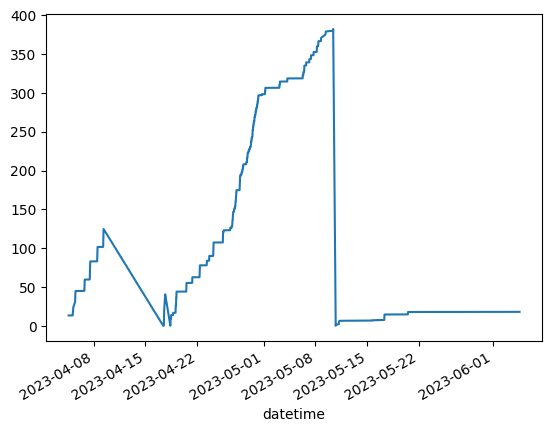

In [16]:
# Wärmemenge Sekundärseitig

e_gshp_hm_sec = graphql_requests.request_sensor_readings_idn(2, idn_e_gshp_hm_sec, start_epoch, end_epoch)
e_gshp_hm_sec = e_gshp_hm_sec.rename("e_gshp_hm_sec")
print(e_gshp_hm_sec)
print("mean =", e_gshp_hm_sec.mean())
print("median =", e_gshp_hm_sec.median())

e_gshp_hm_sec.plot()

### Volumenstrom Sekundärseitg

datetime
2022-11-02 10:08:43      0.000000
2022-11-02 10:09:13      0.000000
2022-11-02 10:16:26      0.000000
2022-11-02 10:16:56      0.000000
2022-11-02 10:17:26      0.000000
                          ...    
2023-05-20 12:25:24    462.510010
2023-05-20 12:25:54    333.440002
2023-05-20 12:26:24      0.000000
2023-05-24 21:23:30      0.200000
2023-05-29 07:06:10      0.090000
Name: vdot_gshp_sec, Length: 513281, dtype: float64
mean = 180.25815830318905
median = 0.0


<Axes: xlabel='datetime'>

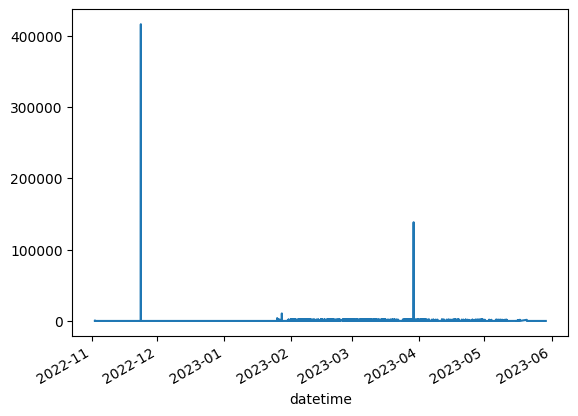

In [17]:
# Volumenstrom Sekundärseitg


vdot_gshp_sec = graphql_requests.request_sensor_readings_idn(2, idn_vdot_gshp_sec, start_epoch, end_epoch)
vdot_gshp_sec = vdot_gshp_sec.rename("vdot_gshp_sec")
print(vdot_gshp_sec)
print("mean =", vdot_gshp_sec.mean())
print("median =", vdot_gshp_sec.median())

vdot_gshp_sec.plot()

# Explore

COP = T_source / (T_source - T_sink)

T_source = 1 = t_gshp_prim_flow

T_sink = 6 = t_gshp_sec_return


idea: resample timeseries by approximating available data by the minute.
How to handle double data?

In [39]:
# mean value of the measurements within the time interval 'T' (minute)

t_gshp_prim_flow_mean = t_gshp_prim_flow.resample('T').mean()
t_gshp_prim_flow_mean

# remove outliers -> some datapoints are deleted which do not have to be deleted. Not used!
    # t_gshp_prim_flow_clean = remove_outliers(t_gshp_prim_flow)
    # deleted_rows = t_gshp_prim_flow[~t_gshp_prim_flow.index.isin(t_gshp_prim_flow_clean.index)]
    # deleted_rows

# count number of measurements in the time interval
t_gshp_prim_flow_count = t_gshp_prim_flow.resample('T').count()
    # 113782 2023-01-20T10:30:00.000 109
    # 221857 2023-04-05T11:45:00.000 41
    # 221858 2023-04-05T11:46:00.000 5


# sandard deviation: 
t_gshp_prim_flow_std = t_gshp_prim_flow.resample('T').std()
    # 286682 2023-05-20T12:10:00.000 16.4260902033
    # 12949 2022-11-11T09:57:00.000 17.1826947828
    # 309472 2023-06-05T08:00:00.000 20.697015809
    # 318670 2023-06-11T17:18:00.000 24.826519519


t_gshp_sec_return_mean = t_gshp_sec_return.resample('T').mean()
t_gshp_sec_return_mean

cop = t_gshp_prim_flow_mean.append(t_gshp_sec_return_mean)


AttributeError: 'Series' object has no attribute 'append'